In [1]:
#std modules
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.spatial.distance import cdist,pdist,squareform
from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN,KMeans,MeanShift,estimate_bandwidth
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import sklearn.preprocessing
import sys

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import myvalidation
%autoreload 2

In [3]:
example_dist=np.loadtxt("example_distances.dat.gz")

In [4]:
def dcolumn2mat(data):
    ndata = int(np.max(data[:,1]))
    D = np.zeros(ndata*ndata)
    D.shape = (ndata,ndata)
    for line in data:
        I = int(line[0])-1
        J = int(line[1])-1
        D[I,J] = line[2]
        D[J,I] = line[2]
    return(D)

In [5]:
def plot_histo(x, ignore=None):
    "Generate and plot a histogram for some data. The optional ignore is a histogram index to 0 out."
    h,b = np.histogram(x)
    if ignore is not None: h[ignore] = 0
    c = (b[:-1]+b[1:])/2
    w = 0.7*(b[1]-b[0])
    return plt.bar(c,h,align='center',width=w)
colors=['red','green','blue','yellow','orange','cyan','magenta']

Data set size:  (2000, 2000)
Maximum distance:  1.232


Text(0.5,1,'distance histogram')

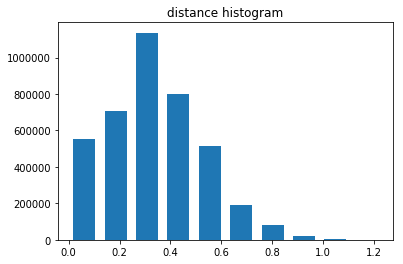

In [6]:
D=dcolumn2mat(example_dist)
print("Data set size: ",D.shape)
print("Maximum distance: ",np.max(D))
tt=plot_histo(D)
plt.title(r"distance histogram")

In [7]:
cutoff = 0.033
#cutoff = "auto"
estimator = myclusters.density_peaks(cutoff=cutoff,kernel="gaussian",\
                                     metric="precomputed")
                                     #metric="euclidean",X=np.loadtxt("fig2_panelB.dat"))
print("Cutoff: ",estimator.cutoff)
rho,delta = estimator.decision_graph(D=D)
nneigh = estimator.nneigh
print(len(nneigh))
np.any(nneigh==0.)

Cutoff:  0.033
2000


True

Average and std of rho: 37.76266942237251 34.39023941273842


Text(0.5,1,'$\\rho$ histogram')

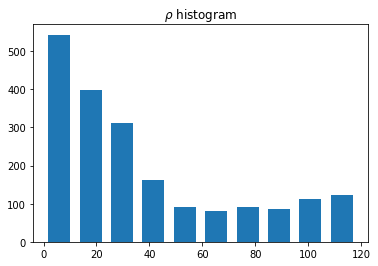

In [8]:
tt=plot_histo(rho)
print("Average and std of rho:",np.mean(rho),np.std(rho))
plt.title(r"$\rho$ histogram")

Average and std of rho: 0.011431499999999999 0.017347314136488105


[0, 0.35, 0, 40]

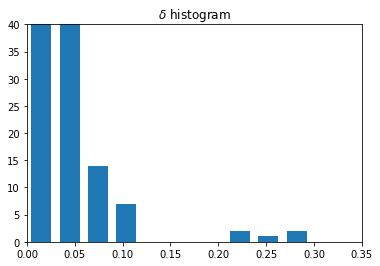

In [9]:
tt = plot_histo(delta)
print("Average and std of rho:",np.mean(delta),np.std(delta))
plt.title(r"$\delta$ histogram")
plt.axis([0,0.35,0,40])

[0, 400, 0, 0.35]

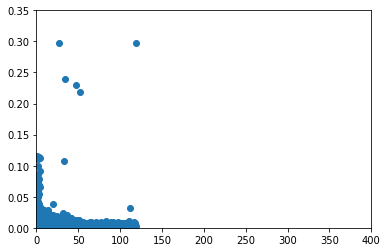

In [10]:
plt.scatter(rho,delta)
plt.axis([0,400,0,0.35])

In [11]:
centroids,points = estimator.get_centroids(rmin=20,dmin=0.1)
print("Found ",estimator.nclusters," clusters")
print("Cores: ",centroids)

Found  6  clusters
Cores:  [ 110  148  450 1309 1348 1578]


Text(0.5,1,'Decision graph')

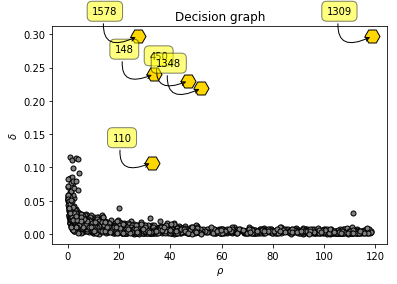

In [12]:
plt.plot(rho[points], delta[points], 'o', markerfacecolor="gray",\
    markeredgecolor='k', markersize=5)

plt.plot(rho[centroids], delta[centroids], 'H', markerfacecolor="gold",\
    markeredgecolor='k', markersize=15)

for c, x, y in zip(centroids, rho[centroids], delta[centroids]):
    plt.annotate(
        c,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=1'),
        fontsize=16)

#left = [1030]
#for c, x, y in zip(left, rho[left], delta[left]):
#    plt.annotate(
#        c,
#        xy = (x, y), xytext = (-50, 0),
#        textcoords = 'offset points', ha = 'right', va = 'bottom',
#        bbox = dict(boxstyle = 'round,pad=0.4', fc = 'yellow', alpha = 0.5),
##        arrowprops = dict(arrowstyle = '->', connectionstyle = 'bar'),
#        fontsize=16)     
    
plt.xlabel(r"$\rho$")
plt.ylabel("$\delta$")
plt.title('Decision graph')

In [13]:
clusters = estimator.assign_points()
print(clusters)
for c in centroids:
    N = len(clusters[clusters==c])
    print("%d elements found in cluster %d" % (N,c))

[ 110  110  110 ... 1309  450 1309]
161 elements found in cluster 110
217 elements found in cluster 148
326 elements found in cluster 450
884 elements found in cluster 1309
297 elements found in cluster 1348
115 elements found in cluster 1578


In [14]:
robust_clusters = estimator.create_halo(D)
for c in centroids:
    N = len(robust_clusters[robust_clusters==c])
    H = len(clusters[clusters==c]) - N
    print("%d elements and %d HALO points found in cluster %d" % (N,H,c))

16 elements and 145 HALO points found in cluster 110
18 elements and 199 HALO points found in cluster 148
250 elements and 76 HALO points found in cluster 450
785 elements and 99 HALO points found in cluster 1309
208 elements and 89 HALO points found in cluster 1348
115 elements and 0 HALO points found in cluster 1578
